# Приветствие
Доброго времени суток!
Меня зовут Голубев Артём Алексеевич.
Ниже представлена работа по анализу датасета из домашнего задания 1.
Приятного времяпровождения! :)

## Замечание
В рамках предподготовки данных после анализа боксплота для дистанции я отрезал дистанции больше 0.5e6.
Так было сделано в видео на платформе, однако в рамках гугл-коллабов я это действие не обнаружил, поэтому сделал сам. Просто во избежание недопонимания держу в курсе, что буду использовать именно такие данные.

**Код обработки**
~~~
question_dist = df[(df['Distance'] > 0.5e6)]
df = df.drop(question_dist.index)
df = df.reset_index(drop=True)
~~~

**Боксплот до обработки:**

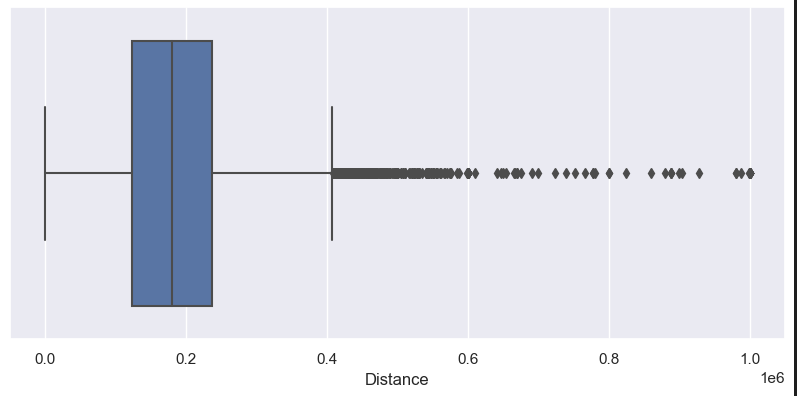

**Боксплот после обработки:**

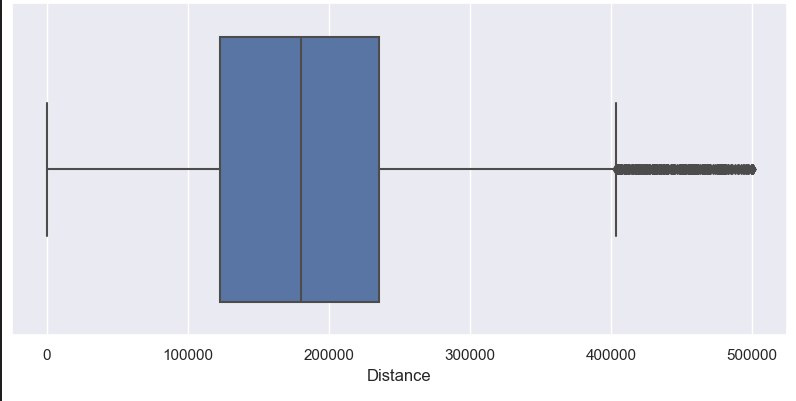

# Задание

ВАМ НЕОБХОДИМО:
Ознакомьтесь с содержанием демонстрационных блокнотов; 
Создайте новый блокнот, импортируйте необходимые библиотеки; 
Скачайте набор данных Cars Moldova и используйте функции и методы библиотеки Pandas для загрузки и начальной работы с данными. Очистку выбросов из "Недели 2" тоже выполняем (в идеале загружаем сразу "очищенный" набор данных);
Выполните следующие задания (Каждое задание в под отдельным заголовком # ).

### 1.  Выполните визуализацию данных с использованием библиотеки Pandas:

Попробуйте разные виды графиков для числовых признаков – скатерограммы, гистограммы, и т. д. 
Для скатерограмм попробуйте использовать категориальные данные для таких параметров графиков, как оттенок (hue), тип маркера (style) и числовые признаки для размер маркера (size), . 
Таким образом, вы можете объединить информацию о нескольких признаков в один двумерный график. 
Визуализируйте как минимум 3 Новых визуализации данных.

### 2.  Попытайтесь добавить в модель дополнительные признаки на основе имеющихся:

Проверьте корреляцию новых признаков с добавленными признаками. Например:

Введите квантильные категории для столбца удельный пробег за год (km year). Чтобы были условно категории «с небольшим пробегом», «со средним пробегом» и «с большим пробегом».
«Умная» замена на редкие категории. В этот раз делайте замену вида «редкий дорогой» и «редкий дешевый», чтобы условные УАЗики не попали в одну группу с Jaguar.

### 3.  Выполните предварительную обработку данных. 

Сохраните результаты разных методов предварительной обработки в разные файлы, чтобы потом у вас была возможность протестировать различные гипотезы на моделях. 
Под разными методами подразумевается стандартизация, нормализация и степенное преобразование для числовых признаков, и Ordinal / One-Hot Encoding для категориальных.
 

### БЛОКНОТ НЕОБХОДИМО ПРИЛЕЖНО ОФОРМИТЬ:  
Хочется видеть структуру (Заголовки разного уровня);  
Ожидается видеть не только код, но и комментарии к нему;  
Не должно быть запущенных ячеек с ошибками;  
Ожидается что рисунки адекватно оформлены (не маленького размера, есть описание того, что на рисунке).
 

### КАК ОТПРАВИТЬ ЗАДАНИЕ НА ПРОВЕРКУ
Вы должны загрузить ipynb вашего решения или ссылку (если дана ссылка, вам нужно убедиться, что режим доступа открыт).


# Набор данных

**Оценка стоимости  и типа трансмиссии по данным продаж автомобилей на вторичном рынке Молдавии**
Набор данных представляет собой статистику параметров автомобилей на вторичном рынке в Молдавии. 

Набор включает ряд категориальных и численных значений, составляющих одну запись (строку). Число записей можно найти как число строк.

Каждый столбец в записи — это отдельный параметр. 

Среди указанных параметров приведены целевой для задачи предсказания (регрессии) - цена автомобиля.

 Также среди параметров есть целевой для задачи классификации - тип трансмиссии. 

# Import библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

# Загружаем предочищенные данные

In [2]:
df = pd.read_csv('content/HW1/cars_moldova_clean.csv', delimiter = ',')
df.head()

Make         Model  Year      Style  Distance  Engine_capacity(cm3)  \
0    Toyota         Prius  2011  Hatchback  195000.0                1800.0   
1   Renault  Grand Scenic  2014  Universal  135000.0                1500.0   
2   Renault        Laguna  2012  Universal  110000.0                1500.0   
3      Opel         Astra  2006  Universal  200000.0                1600.0   
4  Mercedes          Vito  2000   Microvan  300000.0                2200.0   

      Fuel_type Transmission  Price(euro)  Age       km_year  
0        Hybrid    Automatic       7750.0   11  17727.272727  
1        Diesel       Manual       8550.0    8  16875.000000  
2        Diesel       Manual       6550.0   10  11000.000000  
3  Metan/Propan       Manual       4100.0   16  12500.000000  
4        Diesel       Manual       3490.0   22  13636.363636

Посмотрим на наши данные:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32074 entries, 0 to 32073
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32074 non-null  object 
 1   Model                 32074 non-null  object 
 2   Year                  32074 non-null  int64  
 3   Style                 32074 non-null  object 
 4   Distance              32074 non-null  float64
 5   Engine_capacity(cm3)  32074 non-null  float64
 6   Fuel_type             32074 non-null  object 
 7   Transmission          32074 non-null  object 
 8   Price(euro)           32074 non-null  float64
 9   Age                   32074 non-null  int64  
 10  km_year               32074 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 2.7+ MB


Определим количество категориальных и числовых данных:

In [4]:
cat_columns = []
num_columns = []

for column_name in df.columns:
    if (df[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('Категориальные данные:\t ',cat_columns, '\nЧисло столблцов =',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\nЧисло столблцов =',len(num_columns))

Категориальные данные:	  ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission'] 
Число столблцов = 5
Числовые данные:	  ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'Age', 'km_year'] 
Число столблцов = 6


А теперь наконец-то перейдём к выполнению заданий!

# 1.  Выполните визуализацию данных с использованием библиотеки Pandas

* Попробуйте разные виды графиков для числовых признаков – скатерограммы, гистограммы, и т. д. 
* Для скатерограмм попробуйте использовать категориальные данные для таких параметров графиков, как оттенок (hue), тип маркера (style) и числовые признаки для размер маркера (size), . 
* Таким образом, вы можете объединить информацию о нескольких признаков в один двумерный график. 
Визуализируйте как минимум 3 Новых визуализации данных.

## Для начала воспользуемся средствами Pandas. 
Подписи с анализом по графикам будут ниже самого графика.

### Гистограммы
Построим гистограмму по ценам авто, непрозрачность 70%:

<AxesSubplot: ylabel='Frequency'>

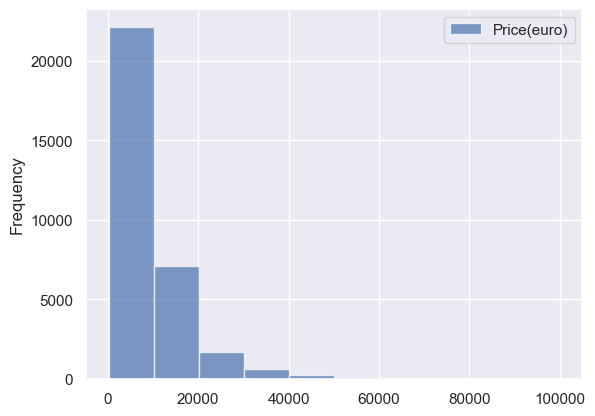

In [5]:
df[['Price(euro)']].plot.hist(alpha=0.7)

Как видим, наиболее часто встречаются автомобили стоимостью до 20 тысяч евро.

### Усатые ящики
Построим боксплоты по годам производства и возрастам авто (дада, они взаимосвязаны, просто я ленивый для построения выводов об одной величине на основании пересчета другой "в уме"):

<AxesSubplot: >

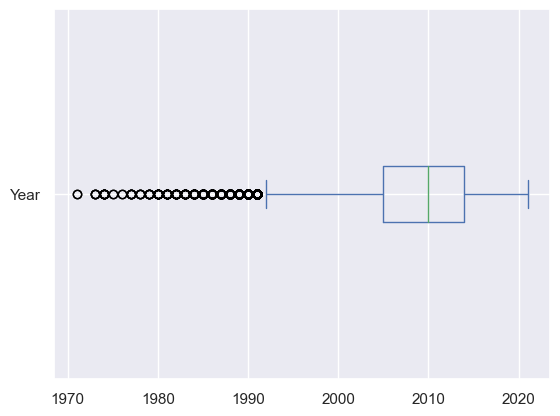

In [6]:
df[['Year']].plot.box(vert=False)

<AxesSubplot: >

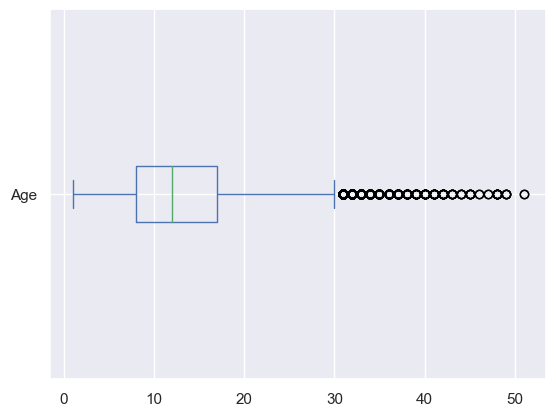

In [7]:
df[['Age']].plot.box(vert=False)

Из рассмотрения боксплотов по годам производства и возрасту автомобилей видим, что основные выбросы связаны со старыми автомобилями до ~1990 годов выпуска (30+ лет), а наиболее часто продаются автомобили возрастом в 10-12 лет (2010 годов производства). В целом, два данных параметра дублируют друг друга, поэтому далее я бы мог избавить от столбца год. Но пока что не буду :)

### Гексагональные скатерограммы
Довольно красивая визуализация зависимости пройденной дистанции от возраста авто:

<AxesSubplot: xlabel='Age', ylabel='Distance'>

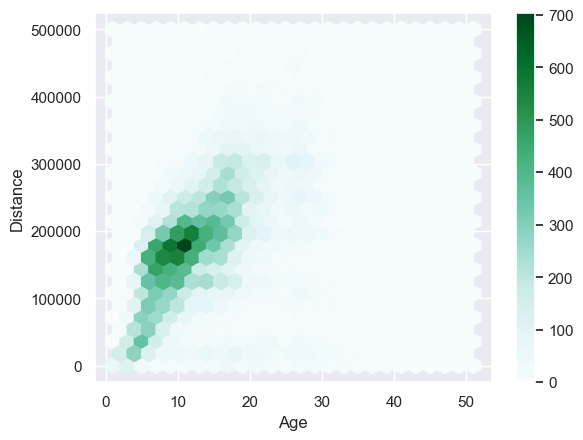

In [8]:
df.plot.hexbin(x='Age', y='Distance', gridsize=25)

Здесь в целом видим логичное линейное распределение: чем выше возраст автомобиля, тем, как правило, он проходит большую дистанцию.

### Скатерограмма
Посмотрим на зависимость цены от возраста авто:

<AxesSubplot: xlabel='Age', ylabel='Price(euro)'>

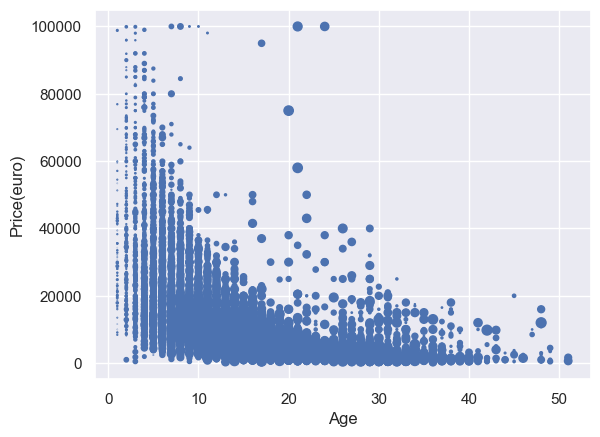

In [9]:
df.plot.scatter(x="Age", 
    y="Price(euro)", 
    s=df['Distance']/10000
)

Тут тоже видим логичную картину: чем старше автомобиль, тем меньше на него цена. 
Кроме того, чем старше автомобиль, тем выше у него пробег (площадь точки).
Есть несколько очень дорогих экземпляров в районе 20-25 лет, но я бы их отнёс к выбросам.

## Воспользуемся инструментами библиотеки seaborn.
Подписи с моей диванной аналитикой также будут чуть ниже графиков :)

### Объединенные графики
Тут мы строим зависимость объема двигателя от возраста в виде гексагонального скаттерплота, для каждой оси которого нарисована ещё и гистограмма. Очень удобный инструмент. Цвет решил использовать черный, но даже с ним контрастность так себе:

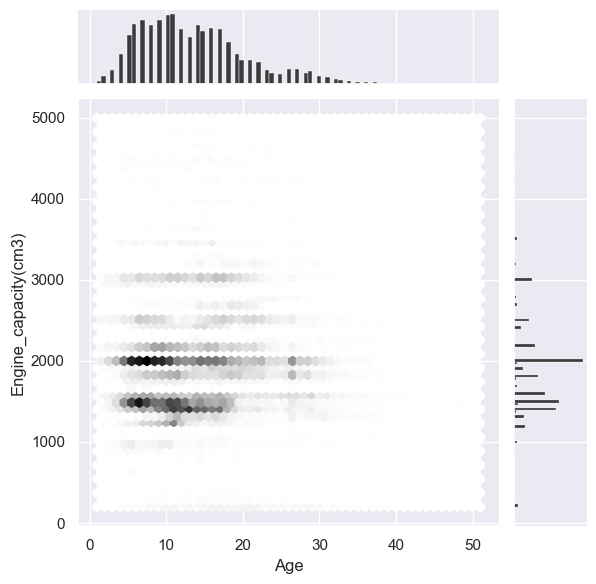

In [10]:
sns.jointplot(data=df, 
    x='Age', 
    y='Engine_capacity(cm3)', 
    kind="hex", 
    color="#000000"
)

Здесь мы видим, что объемы двигателей являются относительно "дискретной" величиной. Наиболее распространеными объемами можно назвать 2л, затем что-то вокруг 1.5л, ну и особо я бы выделил 3л моторы.
Интересно, что наиболее часто 2л и 1.5л моторы встречаются для относительно молодых машин возрастом 5-10 лет. Вероятно, обусловлено это условными "евро-нормами" и общей стандартизацией автомобильных платформ.

### Тоже скаттерплот, но зато какой!
Тут я научился менять размеры графиков и использовал цветовое разбиение по типам используемого топлива. Ну ещё размер точек сделал зависимым от пробега.

<AxesSubplot: xlabel='Year', ylabel='km_year'>

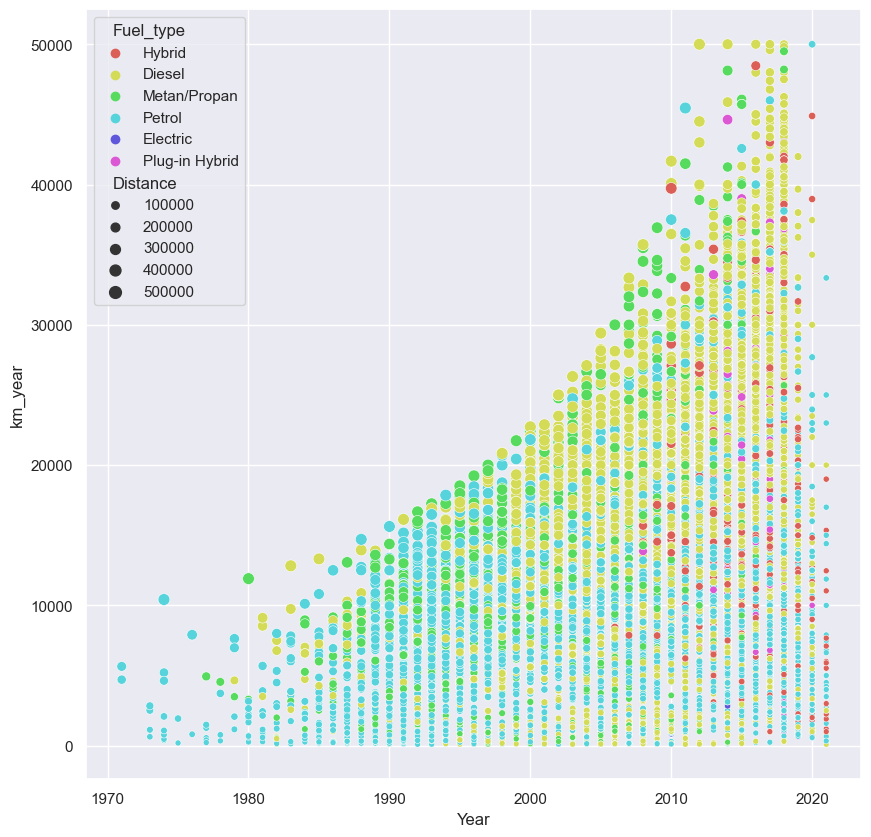

In [11]:
plt.figure(figsize=(10,10))
sns.scatterplot(    
    data=df,
    x="Year", y="km_year",
    hue="Fuel_type", 
    size = "Distance",
    palette='hls'
)

Здесь мы видим, что:
1. Чем старше автомобиль, тем меньше он проезжает за год: скорее всего машины просто стоят в гараже и не используются. 
2. Самым дальнобойным видом топлива является дизель.
3. Где-то с конца 2000 / начала 2010 начинается эра гибридов и подобных тачек (красные точки). Ладно, на самом деле они просто начинают появляться, тогда как дизель захватил рынок с 2000 годов. До этого главный упор был на бензин и метан/пропан.
4. По соотношению размера точек к их высоте можно сделать вывод, что чем больше автомобиль проезжает за год, тем больше у него пройдена общая дистанция. Удивительные факты, до которых невозможно дойти без использования графиков :D 

### Вывод
Графики (все их возможные вариации) - очень полезная штука для анализа информации. Многие выводы можно сделать просто благодаря качественной визуализации.
Надеюсь, сделанных мною визуализаций и выводов достаточно.

# 2. Попытайтесь добавить в модель дополнительные признаки на основе имеющихся:
Проверьте корреляцию новых признаков с добавленными признаками. Например:

* Введите квантильные категории для столбца удельный пробег за год (km year). Чтобы были условно категории «с небольшим пробегом», «со средним пробегом» и «с большим пробегом».
* «Умная» замена на редкие категории. В этот раз делайте замену вида «редкий дорогой» и «редкий дешевый», чтобы условные УАЗики не попали в одну группу с Jaguar.

Скопируем исходный датафрейм в новую переменную **df_2** (по номеру подпункта), с которой и будем работать в дальнейшем.

In [12]:
df_2 = df.copy()
df_2.head(2)

Make         Model  Year      Style  Distance  Engine_capacity(cm3)  \
0   Toyota         Prius  2011  Hatchback  195000.0                1800.0   
1  Renault  Grand Scenic  2014  Universal  135000.0                1500.0   

  Fuel_type Transmission  Price(euro)  Age       km_year  
0    Hybrid    Automatic       7750.0   11  17727.272727  
1    Diesel       Manual       8550.0    8  16875.000000

## 2.1. Создадим квантильные категории для столбца удельный пробег:

Для начала глянем на статистику по удельному пробегу за год:

In [13]:
df_2['km_year'].describe()

count    32074.000000
mean     14882.489475
std       7251.805242
min        100.000000
25%      10250.000000
50%      14432.509804
75%      18800.000000
max      50000.000000
Name: km_year, dtype: float64

Видим, что разбег значений у нас находится от 100 до 50 000 км.

Хочу округлить удельный пробег за год до целых:

In [14]:
df_2['km_year'] = df_2['km_year'].apply(lambda x: round(x, 0))
df_2['km_year']

0        17727.0
1        16875.0
2        11000.0
3        12500.0
4        13636.0
          ...   
32069    14667.0
32070    11250.0
32071    12714.0
32072    23125.0
32073    18750.0
Name: km_year, Length: 32074, dtype: float64

### Создаём квантильные категории удельного пробега

Попробуем разбить на 3 равные по числу машин группы «с небольшим пробегом» == **'Low'**, «со средним пробегом» == **'Medium'** и «с большим пробегом» == **'High'**. Для этого используем функцию pd.qcut:

In [15]:
df_2['km_year_category'] = pd.qcut(df_2['km_year'], 3, labels=['Low', 'Medium', 'High'])

Посмотрим на то, как это выглядит в рамках таблицы:

In [16]:
df_2[['Distance', 'km_year', 'km_year_category']].sample(5)

Distance  km_year km_year_category
15141  320000.0  18824.0             High
13976  184266.0  20474.0             High
16893  167000.0  10438.0              Low
11048  193259.0  16105.0           Medium
676    286350.0  13636.0           Medium

Действительно, получились 3 плюс-минус равные по числу участников группы:

In [17]:
df_2['km_year_category'].value_counts()

Low       10694
Medium    10691
High      10689
Name: km_year_category, dtype: int64

Вот как это выглядит на графиках:

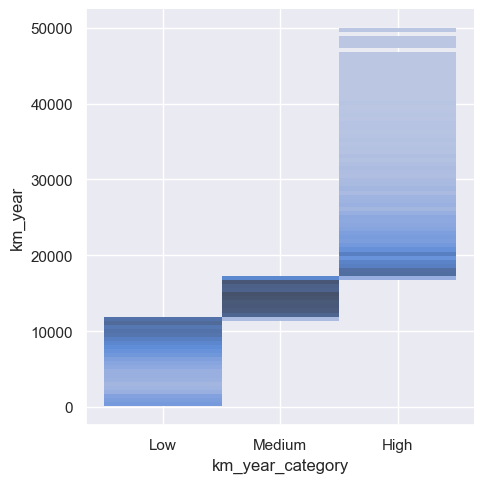

In [18]:
sns.displot(
    df_2, x='km_year_category', y='km_year',
)

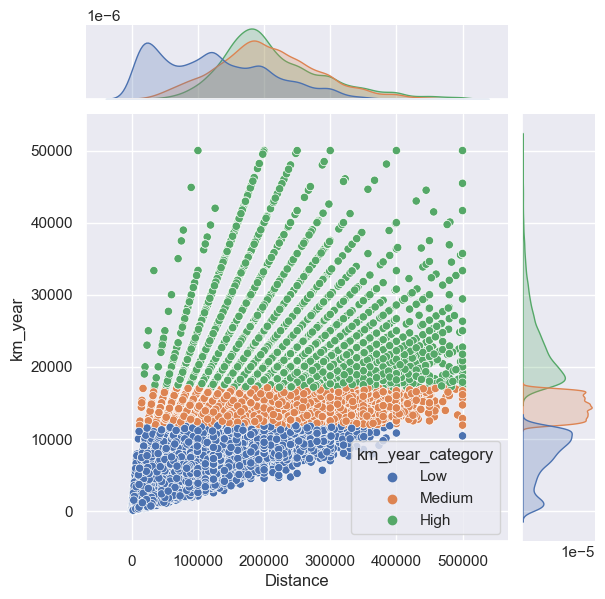

In [19]:
sns.jointplot(data=df_2,
    x="Distance", y="km_year",
    hue='km_year_category'
)

### Дополнение
Мне показалось подобное разбиение несколько неинтуитивным, поэтому я попробую добавить ещё одну категорию с разбиением на три группы по удельному пробегу не в зависимости от их "населённости", а в зависимости именно от расстояния. То есть я хочу, чтобы диапазоны удельных расстояний для каждой группы были равными. Для этого создам функцию, которая будет проверять принадлежность конкретного удельного расстояния тому или иному диапазону расстояний.

Сначала узнаем максимальный пробег за год:

In [20]:
df_2['km_year'].max()

50000.0

Теперь запишем функцию, в которой используем найденное выше значение максимального пробега. Для того, чтобы сделать эту категорию "уникальной", к типу категории добавим окончание '_e':

In [21]:
def km_year_equal_distance(arg):
    if arg < 50000 / 3:
        return 'Low_e'
    elif 50000 / 3 <= arg < 2*50000 / 3:
        return 'Medium_e'
    else:
        return 'High_e'

Создадим новый столбец с равными категориями при помощи написанной выше функции:

In [22]:
df_2['km_year_equal_category'] = df_2['km_year'].apply(km_year_equal_distance).astype('category')
df_2[['Distance', 'km_year', 'km_year_category', 'km_year_equal_category']].sample(5)

Distance  km_year km_year_category km_year_equal_category
15913  158000.0  15800.0           Medium                  Low_e
17911  188000.0  15667.0           Medium                  Low_e
27516  159000.0  14455.0           Medium                  Low_e
23677  222144.0  14810.0           Medium                  Low_e
23173  220000.0  10000.0              Low                  Low_e

Посмотрим, как выглядят графики теперь:

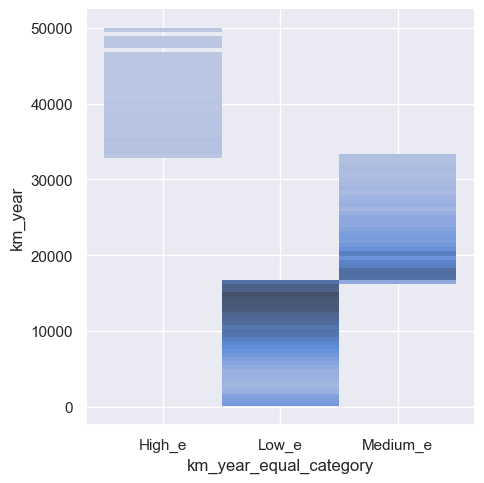

In [23]:
sns.displot(
    df_2, x='km_year_equal_category', y='km_year',
)

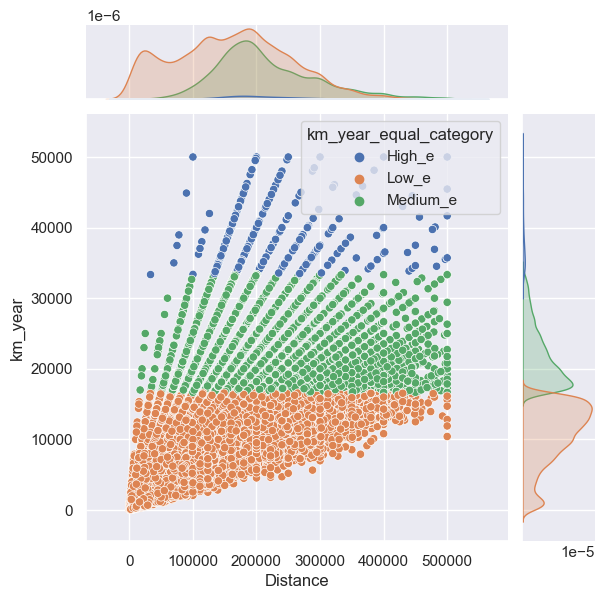

In [24]:
sns.jointplot(data=df_2,
    x="Distance", y="km_year",
    hue='km_year_equal_category'
)

In [25]:
df_2['km_year_equal_category'].value_counts()

Low_e       20465
Medium_e    11098
High_e        511
Name: km_year_equal_category, dtype: int64

Так будто бы выглядит более логично: теперь мы видим, что наиболее многочисленной является категория с низким удельным пробегом до 16.67 тыс. км. (20465 авто), далее идёт категория со средним пробегом от 16.67 до 33.33 тыс. км. (11098 авто) и, наконец, самой малочисленной категорией являются "дальнобойщики", проезжающие больше 33.33 тыс. км. в год (511 авто).

## 2.2. Проведем умную замену на новые признаки:

«Умная» замена на редкие категории. В этот раз делайте замену вида «редкий дорогой» и «редкий дешевый», чтобы условные УАЗики не попали в одну группу с Jaguar.

### Для начала рассмотрим наиболее малочисленные модели:

In [26]:
df_2['Make'].value_counts().tail(20)

Seat              239
Porsche           190
Fiat              183
Suzuki            152
Subaru            150
Rover              90
Chrysler           83
Jeep               77
Mini               72
Infiniti           67
Jaguar             64
Daewoo             63
Dodge              49
Lincoln            49
Alfa Romeo         38
Smart              33
Ssangyong          32
GAZ                30
Moskvich / Izh     29
Daihatsu           25
Name: Make, dtype: int64

Видим, что в целом можно сделать отсечение "редкости" по 100 авто: если число автомобилей данной марки не превышает 100 штук, то автомобильная марка будет редкой. Кроме того не стоит забывать, что у нас уже есть следующее количество редких авто:

In [27]:
df_2['Make'].value_counts()['Rare']

250

Их тоже стоит "умно" прокатегоризировать, чтобы они не выпадали из общей картины.

### Теперь рассмотрим данные по ценам.
Для этого построим боксплот и гистограмму, а также используем метод describe():

<AxesSubplot: xlabel='Price(euro)'>

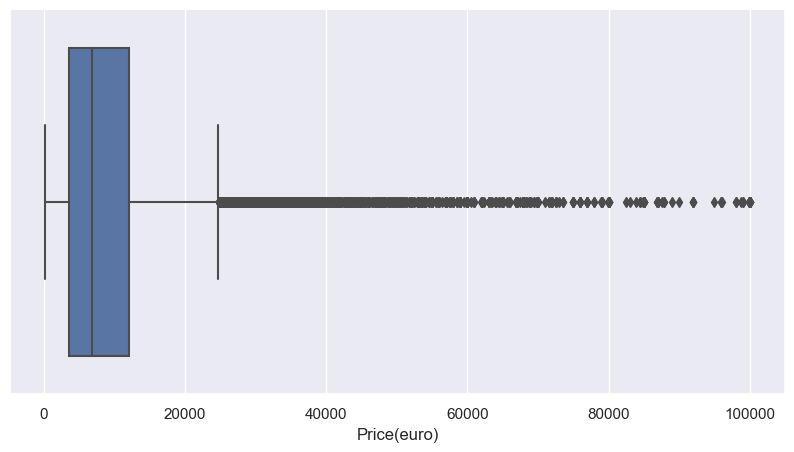

In [28]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df_2['Price(euro)'])

<AxesSubplot: xlabel='Price(euro)', ylabel='Count'>

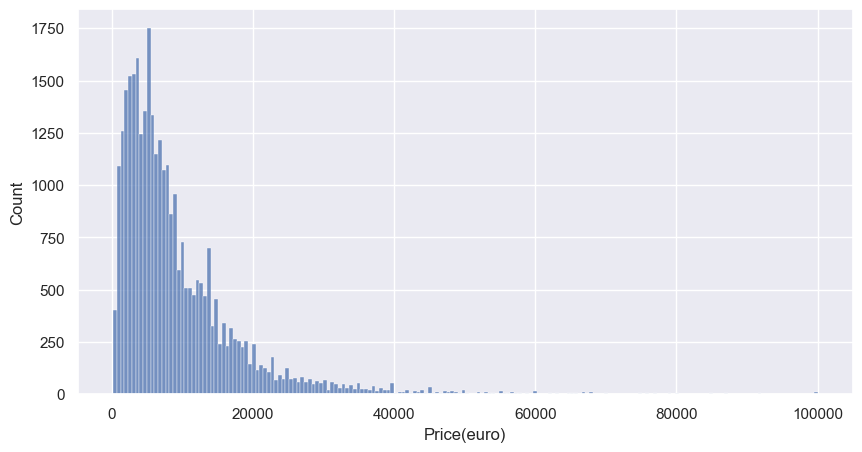

In [29]:
plt.figure(figsize=(10,5))
sns.histplot(x=df_2['Price(euro)'])

In [30]:
df_2['Price(euro)'].describe()

count     32074.000000
mean       9479.187722
std        9531.545838
min         200.000000
25%        3600.000000
50%        6799.000000
75%       12075.250000
max      100000.000000
Name: Price(euro), dtype: float64

Попробуем взять в качестве отсечки по стоимости медианное значение, а именно 6799 евро. То есть авто ценой ниже или равной этой будут считаться дешевыми, а выше - дорогими.
Отсюда получаем две категории **'Rare cheap'** и **'Rare expensive'**, которые запишем в новый столбец **'Make_smart'**.

### Создаём новые категории.
1. Для начала применим критерии отбора редких автомобилей и запишем результаты в столбец df_2['Make_smart']

In [31]:
counts = df_2['Make'].value_counts()
rare =  counts[(counts.values < 100) | (counts.index == 'Rare')]
df_2['Make_smart'] = df_2['Make'].replace(rare.index.values, 'Rare')

df_2['Make_smart'].value_counts().head(15)

Volkswagen    3396
Toyota        3066
Mercedes      2993
BMW           2582
Renault       2344
Opel          1812
Skoda         1726
Audi          1538
Ford          1341
Dacia         1336
Nissan        1252
Hyundai       1216
Rare          1051
Honda          887
KIA            654
Name: Make_smart, dtype: int64

Как видим, категория 'Rare' стала более обширной и теперь насчитывает 1051 автомобиль

2. Теперь нам необходимо среди редких авто выделить 2 категории - дорогие и дешёвые в зависимости от цены. Результаты занесём в тот же столбец 'Make_smart'.

Делаю я это очень криво через вот такой вот цикл, но более рабочего решения (через функцию или замену значений) я найти не смог, хотя бился очень долго. Но оно работает, а потому сойдёт:

In [32]:
new_rare_cheap = df_2['Make_smart'][df_2['Make_smart'] == 'Rare'][df_2['Price(euro)'] <= df_2['Price(euro)'].median()]
new_rare_expensive = df_2['Make_smart'][df_2['Make_smart'] == 'Rare'][df_2['Price(euro)'] > df_2['Price(euro)'].median()]

make_smart = []
for i in df_2.index:
    if i in new_rare_expensive.index:
        make_smart.append('Rare expensive')
    elif i in new_rare_cheap.index:
        make_smart.append('Rare cheap')
    else:
        make_smart.append(df_2.iloc[i]['Make_smart'])

df_2['Make_smart'] = make_smart

Проверим, всё ли в порядке на примере среза таблицы:

In [33]:
df_2[['Make', 'Make_smart', 'Price(euro)']][15:30]

Make      Make_smart  Price(euro)
15      Nissan          Nissan       8300.0
16     Hyundai         Hyundai       3200.0
17        Audi            Audi       9299.0
18    Mercedes        Mercedes       6900.0
19         GAZ      Rare cheap       2222.0
20     Renault         Renault       5700.0
21        Rare  Rare expensive      27000.0
22    Mercedes        Mercedes      18350.0
23     Lincoln  Rare expensive      17800.0
24       Lexus           Lexus      27999.0
25       Dodge      Rare cheap       4495.0
26        Audi            Audi       2950.0
27     Porsche         Porsche      30222.0
28       Lexus           Lexus      17990.0
29  Volkswagen      Volkswagen       9800.0

Как видим, GAZ теперь стал редким и дешёвым, а автомобиль под индексом 21 из просто редкого превратился в редкий и дорогой.

In [34]:
df_2['Make_smart'].value_counts().loc[['Rare cheap', 'Rare expensive']]

Rare cheap        660
Rare expensive    391
Name: Make_smart, dtype: int64

Редких и дорогих автомобилей почти в 1.7 раза меньше, чем редких и дешёвых.

## 2.3. Добавим новый признак: Дистанция / евро
Просто разделим пройденное расстояние на цену автомобиля. В результате получим величину, которая характеризует ту дистанцию, которую автомобиль проехал за 1 евро своей стоимости. Довольно "несуразная" метрика, но попробуем её рассмотреть и сделать выводы.

In [35]:
df_2['km_per_euro'] = round(df_2['Distance'] / df_2['Price(euro)'], 1)
df_2.head()

Make         Model  Year      Style  Distance  Engine_capacity(cm3)  \
0    Toyota         Prius  2011  Hatchback  195000.0                1800.0   
1   Renault  Grand Scenic  2014  Universal  135000.0                1500.0   
2   Renault        Laguna  2012  Universal  110000.0                1500.0   
3      Opel         Astra  2006  Universal  200000.0                1600.0   
4  Mercedes          Vito  2000   Microvan  300000.0                2200.0   

      Fuel_type Transmission  Price(euro)  Age  km_year km_year_category  \
0        Hybrid    Automatic       7750.0   11  17727.0             High   
1        Diesel       Manual       8550.0    8  16875.0           Medium   
2        Diesel       Manual       6550.0   10  11000.0              Low   
3  Metan/Propan       Manual       4100.0   16  12500.0           Medium   
4        Diesel       Manual       3490.0   22  13636.0           Medium   

  km_year_equal_category Make_smart  km_per_euro  
0               Medium_e     Toyota         25.2  
1               Medium_e    Renault         15.8  
2                  Low_e    Renault         16.8  
3                  Low_e       Opel         48.8  
4                  Low_e   Mercedes         86.0

In [36]:
df_2['km_per_euro'].describe()

count    32074.000000
mean        46.752441
std         65.995464
min          0.000000
25%         11.000000
50%         25.600000
75%         55.100000
max       1250.000000
Name: km_per_euro, dtype: float64

График зависимости пробега за евро от стоимости авто:

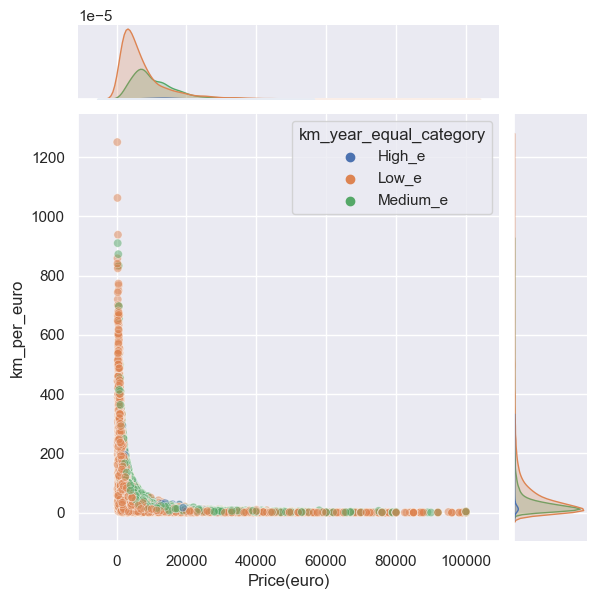

In [37]:
sns.jointplot(data=df_2,
    x="Price(euro)", y="km_per_euro",
    hue='km_year_equal_category',
    alpha=0.5
)

Тут видим логичную картину: чем выше цена, тем меньшее расстояние можно проехать за одни и те же деньги.

## 2.4. Рассмотрим корреляции с учетом новых данных

In [38]:
cm = sns.color_palette("Spectral", as_cmap=True)

df_2.corr(numeric_only=True).style.background_gradient(cmap=cm, vmin = -1, vmax=1)

Видим наибольшую корреляцию между возрастом и пробегом за евро, построим график:

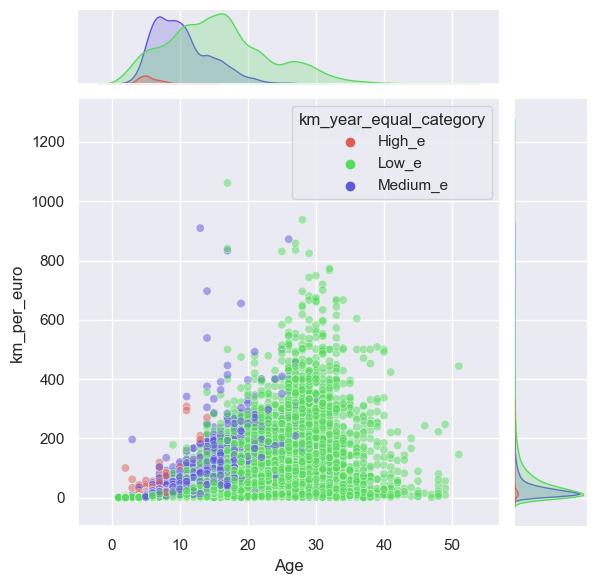

In [39]:
sns.jointplot(data=df_2,
    x="Age", y="km_per_euro",
    hue='km_year_equal_category',
    alpha=0.5,
    palette="hls"
)

Действительно, с возрастом пройденное расстояние за 1 евро увеличивается. Связано это как с увеличением пробега по мере "старения" авто (числитель), так и с меньшими ценами на старые авто (знаменатель).

Построим пэирплот с учетом новых данных (у меня считалось 2 минуты):

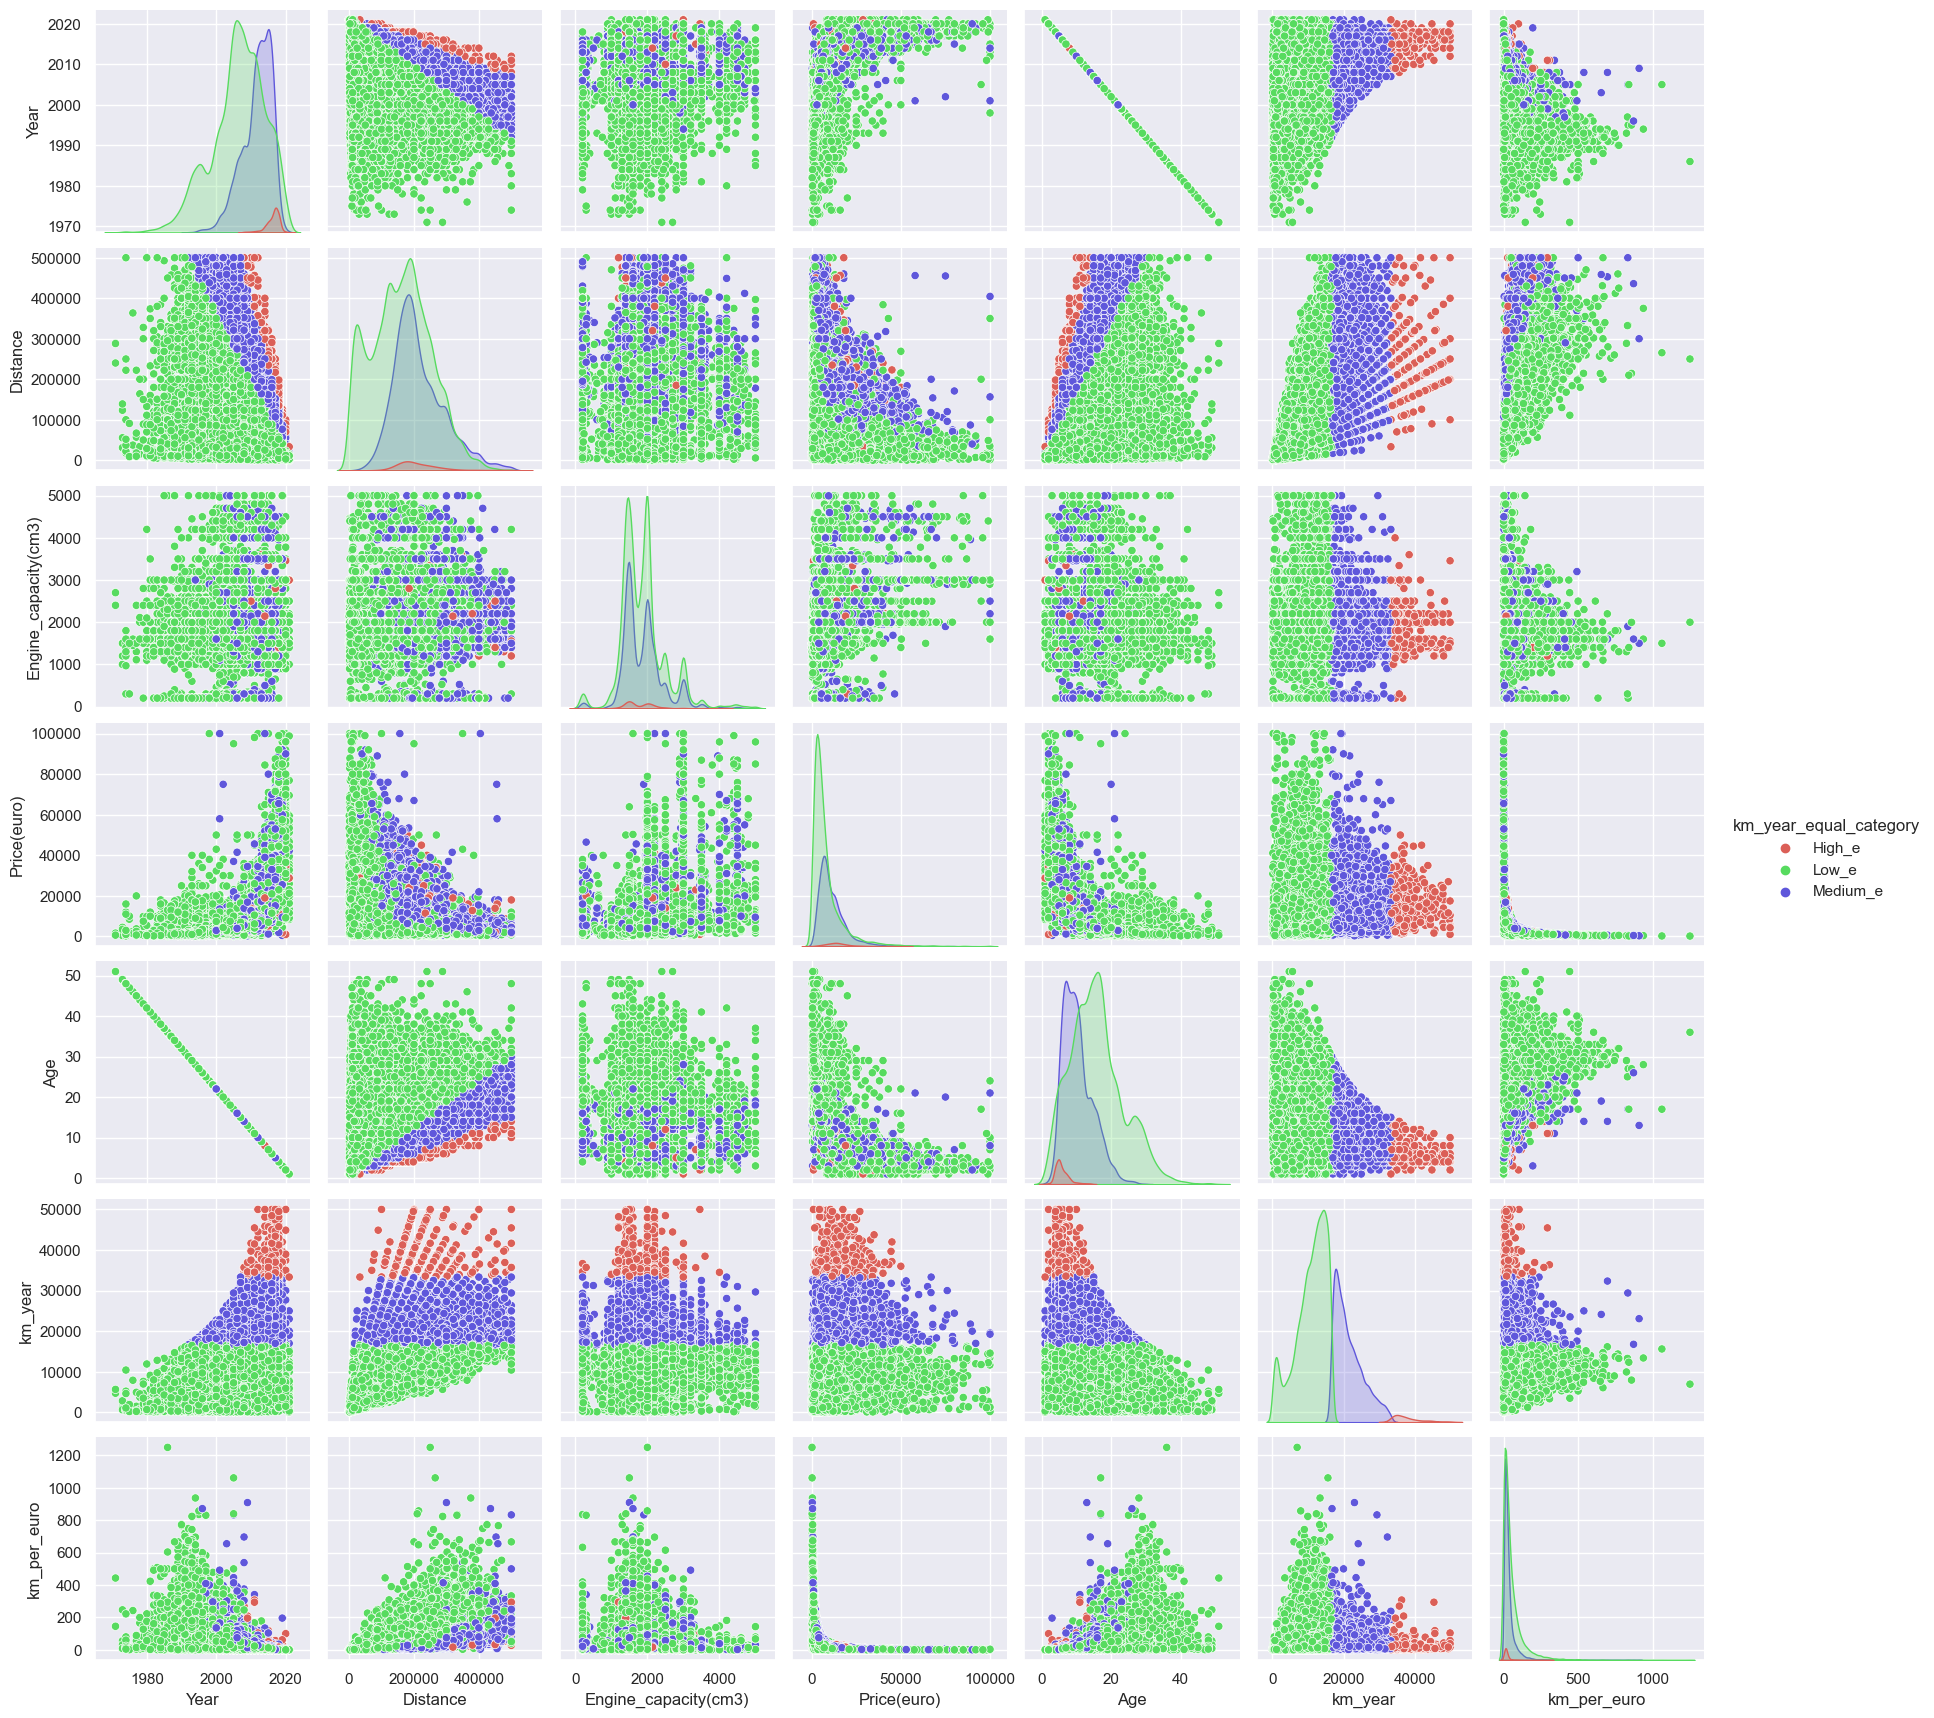

In [40]:
sns.pairplot(data = df_2, hue='km_year_equal_category', palette="hls")

Ну очень интересно и познавательно :)

Есть один график, который мне не очень понятен. Это km_per_euro от km_year. Из него видно, что чем больше удельный пробег в год, тем меньше км за евро. Это кажется мне чем-то странным, ведь чем больше удельный пробег, тем как правило ниже цена и больше пройденная суммарная дистанция, а тут будто наоборот. Ну да ладно, не везде же быть гением анализа =)

# 3.  Выполните предварительную обработку данных. 

* Сохраните результаты разных методов предварительной обработки в разные файлы, чтобы потом у вас была возможность протестировать различные гипотезы на моделях. 
* Под разными методами подразумевается стандартизация, нормализация и степенное преобразование для числовых признаков, и Ordinal / One-Hot Encoding для категориальных.

Для начала скопируем полученный ранее датафрейм в новую переменную:

In [41]:
df_3 = df_2.copy()
df_3.head(3)

Make         Model  Year      Style  Distance  Engine_capacity(cm3)  \
0   Toyota         Prius  2011  Hatchback  195000.0                1800.0   
1  Renault  Grand Scenic  2014  Universal  135000.0                1500.0   
2  Renault        Laguna  2012  Universal  110000.0                1500.0   

  Fuel_type Transmission  Price(euro)  Age  km_year km_year_category  \
0    Hybrid    Automatic       7750.0   11  17727.0             High   
1    Diesel       Manual       8550.0    8  16875.0           Medium   
2    Diesel       Manual       6550.0   10  11000.0              Low   

  km_year_equal_category Make_smart  km_per_euro  
0               Medium_e     Toyota         25.2  
1               Medium_e    Renault         15.8  
2                  Low_e    Renault         16.8

Импортируем библиотеку scikit-learn:

In [42]:
from sklearn import preprocessing as prep


Подготовим данные: для дальнейших преобразований нам подходят только числовые данные, поэтому создадим датафрейм из числовых данных с помощью select_dtypes(['number']):

In [43]:
df_3_num = df_3.select_dtypes(['number'])
df_3_num.head(3)

Year  Distance  Engine_capacity(cm3)  Price(euro)  Age  km_year  \
0  2011  195000.0                1800.0       7750.0   11  17727.0   
1  2014  135000.0                1500.0       8550.0    8  16875.0   
2  2012  110000.0                1500.0       6550.0   10  11000.0   

   km_per_euro  
0         25.2  
1         15.8  
2         16.8

Также создадим датафрейм со всеми остальными типами данных, его мы также используем позднее:

In [44]:
df_3_other = df_3.select_dtypes(['object', 'category'])
df_3_other.head(3)

Make         Model      Style Fuel_type Transmission km_year_category  \
0   Toyota         Prius  Hatchback    Hybrid    Automatic             High   
1  Renault  Grand Scenic  Universal    Diesel       Manual           Medium   
2  Renault        Laguna  Universal    Diesel       Manual              Low   

  km_year_equal_category Make_smart  
0               Medium_e     Toyota  
1               Medium_e    Renault  
2                  Low_e    Renault

## 3.1. Стандартизация.

Воспользуемся инструментом StandardScaler() из библиотеки sklearn. Запускаем "скелер", обучаем его на нашем датафрейме с числовыми значениями:

In [45]:
scaler = prep.StandardScaler().fit(df_3_num)

Проверяем, как сработало:

In [46]:
print('scaler.mean_ = ', scaler.mean_, end='\n\n')
print('scaler.scale_ = ', scaler.scale_)

scaler.mean_ =  [2.00833600e+03 1.80297721e+05 1.86853177e+03 9.47918772e+03
 1.36639958e+01 1.48824904e+04 4.67524412e+01]

scaler.scale_ =  [7.16266667e+00 9.05401190e+04 6.09815411e+02 9.53139725e+03
 7.16266667e+00 7.25169135e+03 6.59944349e+01]


Теперь стандартизируем наш набор числовых данных. После преобразования он представляет собой массив следующего вида:

In [47]:
df_3_num_scaled = scaler.transform(df_3_num)
df_3_num_scaled 

array([[ 0.37192793,  0.16238414, -0.11238117, ..., -0.37192793,
         0.39225465, -0.32657968],
       [ 0.79076635, -0.50030551, -0.60433332, ..., -0.79076635,
         0.27476482, -0.46901593],
       [ 0.51154073, -0.7764262 , -0.60433332, ..., -0.51154073,
        -0.53539101, -0.45386314],
       ...,
       [ 0.93037915, -1.00836758, -0.60433332, ..., -0.93037915,
        -0.29903236, -0.51598959],
       [-0.32613611,  2.09522896,  0.21558693, ...,  0.32613611,
         1.13663272,  0.69320328],
       [-0.32613611,  1.32209103, -0.60433332, ...,  0.32613611,
         0.53332519,  0.42802941]])

Вернем данным структуру датафрейма:

In [48]:
df_3_num_scaled = pd.DataFrame(df_3_num_scaled, columns=df_3_num.columns)
df_3_num_scaled

Year  Distance  Engine_capacity(cm3)  Price(euro)       Age  \
0      0.371928  0.162384             -0.112381    -0.181420 -0.371928   
1      0.790766 -0.500306             -0.604333    -0.097487 -0.790766   
2      0.511541 -0.776426             -0.604333    -0.307320 -0.511541   
3     -0.326136  0.217608             -0.440349    -0.564365  0.326136   
4     -1.163813  1.322091              0.543555    -0.628364  1.163813   
...         ...       ...                   ...          ...       ...   
32069  1.069992 -1.019412             -0.112381     0.212016 -1.069992   
32070 -0.884587  0.493729             -0.112381    -0.532890  0.884587   
32071  0.930379 -1.008368             -0.604333    -0.260107 -0.930379   
32072 -0.326136  2.095229              0.215587    -0.574857  0.326136   
32073 -0.326136  1.322091             -0.604333    -0.574857  0.326136   

        km_year  km_per_euro  
0      0.392255    -0.326580  
1      0.274765    -0.469016  
2     -0.535391    -0.453863  
3     -0.328543     0.031026  
4     -0.171890     0.594710  
...         ...          ...  
32069 -0.029716    -0.591754  
32070 -0.500916     0.065878  
32071 -0.299032    -0.515990  
32072  1.136633     0.693203  
32073  0.533325     0.428029  

[32074 rows x 7 columns]

А теперь объединим категориальные/объектные данные и наши преобразованные числовые данные в один датафрейм:

In [49]:
df_3_scaled = df_3_other.copy()

for i in df_3_num_scaled.columns:
    df_3_scaled[i] = df_3_num_scaled[i]

df_3_scaled

Make         Model      Style     Fuel_type Transmission  \
0          Toyota         Prius  Hatchback        Hybrid    Automatic   
1         Renault  Grand Scenic  Universal        Diesel       Manual   
2         Renault        Laguna  Universal        Diesel       Manual   
3            Opel         Astra  Universal  Metan/Propan       Manual   
4        Mercedes          Vito   Microvan        Diesel       Manual   
...           ...           ...        ...           ...          ...   
32069  Volkswagen        Passat      Sedan        Petrol    Automatic   
32070  Land Rover    Freelander  Crossover  Metan/Propan       Manual   
32071       Dacia     Logan Mcv  Universal        Diesel       Manual   
32072       Mazda             6      Combi        Diesel       Manual   
32073     Renault  Grand Scenic    Minivan        Diesel       Manual   

      km_year_category km_year_equal_category  Make_smart      Year  Distance  \
0                 High               Medium_e      Toyota  0.371928  0.162384   
1               Medium               Medium_e     Renault  0.790766 -0.500306   
2                  Low                  Low_e     Renault  0.511541 -0.776426   
3               Medium                  Low_e        Opel -0.326136  0.217608   
4               Medium                  Low_e    Mercedes -1.163813  1.322091   
...                ...                    ...         ...       ...       ...   
32069           Medium                  Low_e  Volkswagen  1.069992 -1.019412   
32070              Low                  Low_e  Land Rover -0.884587  0.493729   
32071           Medium                  Low_e       Dacia  0.930379 -1.008368   
32072             High               Medium_e       Mazda -0.326136  2.095229   
32073             High               Medium_e     Renault -0.326136  1.322091   

       Engine_capacity(cm3)  Price(euro)       Age   km_year  km_per_euro  
0                 -0.112381    -0.181420 -0.371928  0.392255    -0.326580  
1                 -0.604333    -0.097487 -0.790766  0.274765    -0.469016  
2                 -0.604333    -0.307320 -0.511541 -0.535391    -0.453863  
3                 -0.440349    -0.564365  0.326136 -0.328543     0.031026  
4                  0.543555    -0.628364  1.163813 -0.171890     0.594710  
...                     ...          ...       ...       ...          ...  
32069             -0.112381     0.212016 -1.069992 -0.029716    -0.591754  
32070             -0.112381    -0.532890  0.884587 -0.500916     0.065878  
32071             -0.604333    -0.260107 -0.930379 -0.299032    -0.515990  
32072              0.215587    -0.574857  0.326136  1.136633     0.693203  
32073             -0.604333    -0.574857  0.326136  0.533325     0.428029  

[32074 rows x 15 columns]

Кажется, на этом со стандартизацией мы закончили. В качестве примера нарисую небольшой джоинтплот:

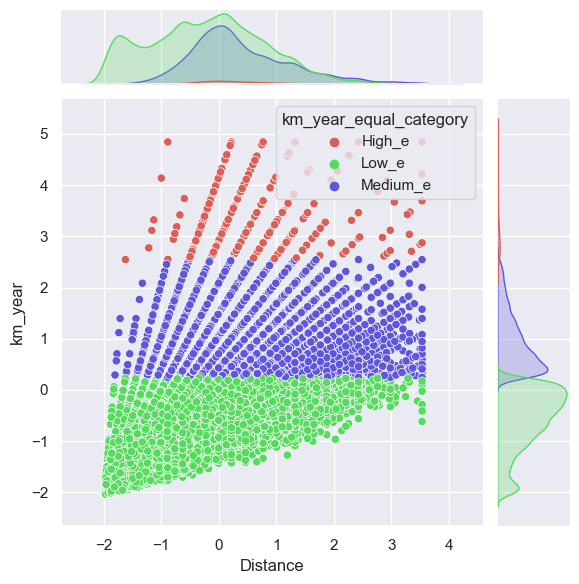

In [50]:
sns.jointplot(data=df_3_scaled,
    x="Distance", y="km_year",
    hue='km_year_equal_category',
    palette='hls'
)

## 3.2. Нормализация.

Воспользуемся инструментом MinMaxScaler() из библиотеки sklearn. Запускаем "нормализатор", обучаем его на нашем датафрейме с числовыми значениями:

In [51]:
MinMax = prep.MinMaxScaler().fit(df_3_num)

Нормализуем... :

In [52]:
df_3_num_norm = MinMax.transform(df_3_num)

Возвращаем структуру датафрейма и объединяем с остальными данными:

In [53]:
df_3_num_norm = pd.DataFrame(df_3_num_norm, columns=df_3_num.columns)

df_3_norm = df_3_other.copy()

for i in df_3_num_norm.columns:
    df_3_norm[i] = df_3_num_norm[i]

df_3_norm


Make         Model      Style     Fuel_type Transmission  \
0          Toyota         Prius  Hatchback        Hybrid    Automatic   
1         Renault  Grand Scenic  Universal        Diesel       Manual   
2         Renault        Laguna  Universal        Diesel       Manual   
3            Opel         Astra  Universal  Metan/Propan       Manual   
4        Mercedes          Vito   Microvan        Diesel       Manual   
...           ...           ...        ...           ...          ...   
32069  Volkswagen        Passat      Sedan        Petrol    Automatic   
32070  Land Rover    Freelander  Crossover  Metan/Propan       Manual   
32071       Dacia     Logan Mcv  Universal        Diesel       Manual   
32072       Mazda             6      Combi        Diesel       Manual   
32073     Renault  Grand Scenic    Minivan        Diesel       Manual   

      km_year_category km_year_equal_category  Make_smart  Year  Distance  \
0                 High               Medium_e      Toyota  0.80  0.389878   
1               Medium               Medium_e     Renault  0.86  0.269854   
2                  Low                  Low_e     Renault  0.82  0.219844   
3               Medium                  Low_e        Opel  0.70  0.399880   
4               Medium                  Low_e    Mercedes  0.58  0.599920   
...                ...                    ...         ...   ...       ...   
32069           Medium                  Low_e  Volkswagen  0.90  0.175835   
32070              Low                  Low_e  Land Rover  0.62  0.449890   
32071           Medium                  Low_e       Dacia  0.88  0.177836   
32072             High               Medium_e       Mazda  0.70  0.739948   
32073             High               Medium_e     Renault  0.70  0.599920   

       Engine_capacity(cm3)  Price(euro)   Age   km_year  km_per_euro  
0                  0.333333     0.075651  0.20  0.353246      0.02016  
1                  0.270833     0.083667  0.14  0.336172      0.01264  
2                  0.270833     0.063627  0.18  0.218437      0.01344  
3                  0.291667     0.039078  0.30  0.248497      0.03904  
4                  0.416667     0.032966  0.42  0.271263      0.06880  
...                     ...          ...   ...       ...          ...  
32069              0.333333     0.113226  0.10  0.291924      0.00616  
32070              0.333333     0.042084  0.38  0.223447      0.04088  
32071              0.270833     0.068136  0.12  0.252786      0.01016  
32072              0.375000     0.038076  0.30  0.461423      0.07400  
32073              0.270833     0.038076  0.30  0.373747      0.06000  

[32074 rows x 15 columns]

Нормализацию тоже сделали, покажем на примере графика:

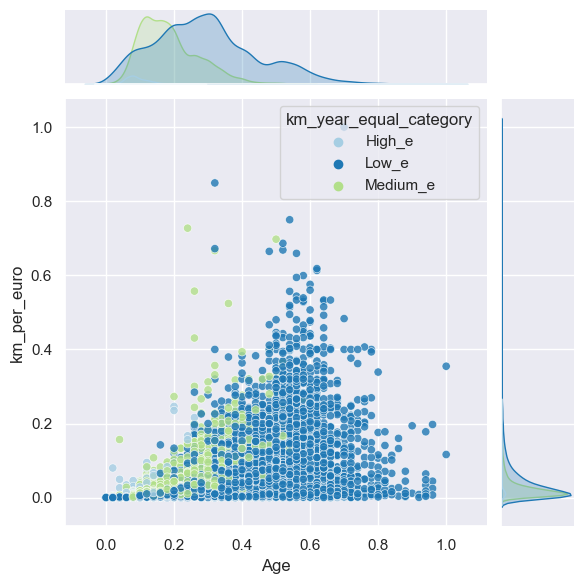

In [54]:
sns.jointplot(data=df_3_norm,
    x="Age", y="km_per_euro",
    hue='km_year_equal_category',
    alpha=0.8,
    palette="Paired"
)

## 3.3. Степенное преобразование.

Воспользуемся инструментом PowerTransformer() из библиотеки sklearn. Запускаем "степенизатор", обучаем его на нашем датафрейме с числовыми значениями:

In [55]:
PowerTr = prep.PowerTransformer().fit(df_3_num)

c:\Users\argol\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\Users\argol\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:247: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


Степенизируем... :

In [56]:
df_3_num_power = PowerTr.transform(df_3_num)

Возвращаем структуру датафрейма и объединяем с остальными данными:

In [57]:
df_3_num_power = pd.DataFrame(df_3_num_power, columns=df_3_num.columns)

df_3_power = df_3_other.copy()

for i in df_3_num_power.columns:
    df_3_power[i] = df_3_num_power[i]

df_3_power

Make         Model      Style     Fuel_type Transmission  \
0          Toyota         Prius  Hatchback        Hybrid    Automatic   
1         Renault  Grand Scenic  Universal        Diesel       Manual   
2         Renault        Laguna  Universal        Diesel       Manual   
3            Opel         Astra  Universal  Metan/Propan       Manual   
4        Mercedes          Vito   Microvan        Diesel       Manual   
...           ...           ...        ...           ...          ...   
32069  Volkswagen        Passat      Sedan        Petrol    Automatic   
32070  Land Rover    Freelander  Crossover  Metan/Propan       Manual   
32071       Dacia     Logan Mcv  Universal        Diesel       Manual   
32072       Mazda             6      Combi        Diesel       Manual   
32073     Renault  Grand Scenic    Minivan        Diesel       Manual   

      km_year_category km_year_equal_category  Make_smart      Year  Distance  \
0                 High               Medium_e      Toyota  0.322832  0.219613   
1               Medium               Medium_e     Renault  0.809772 -0.435924   
2                  Low                  Low_e     Renault  0.481473 -0.727396   
3               Medium                  Low_e        Opel -0.418442  0.272029   
4               Medium                  Low_e    Mercedes -1.203376  1.268813   
...                ...                    ...         ...       ...       ...   
32069           Medium                  Low_e  Volkswagen  1.153315 -0.996311   
32070              Low                  Low_e  Land Rover -0.953579  0.529931   
32071           Medium                  Low_e       Dacia  0.979596 -0.983787   
32072             High               Medium_e       Mazda -0.418442  1.921877   
32073             High               Medium_e     Renault -0.418442  1.268813   

       Engine_capacity(cm3)  Price(euro)       Age   km_year  km_per_euro  
0                 -0.053088     0.168534 -0.216442  0.445004    -0.001286  
1                 -0.571800     0.279745 -0.758633  0.335038    -0.374350  
2                 -0.571800    -0.019866 -0.384414 -0.470060    -0.326389  
3                 -0.394971    -0.531199  0.492360 -0.255460     0.556375  
4                  0.591246    -0.702586  1.157618 -0.097481     1.059125  
...                     ...          ...       ...       ...          ...  
32069             -0.053088     0.620706 -1.202476  0.042890    -0.908269  
32070             -0.053088    -0.455358  0.952286 -0.433778     0.596419  
32071             -0.571800     0.054241 -0.969997 -0.225417    -0.542187  
32072              0.275032    -0.557616  0.492360  1.112282     1.125333  
32073             -0.571800    -0.557616  0.492360  0.575204     0.935711  

[32074 rows x 15 columns]

Сравниваем до и после:

<AxesSubplot: xlabel='Price(euro)', ylabel='Count'>

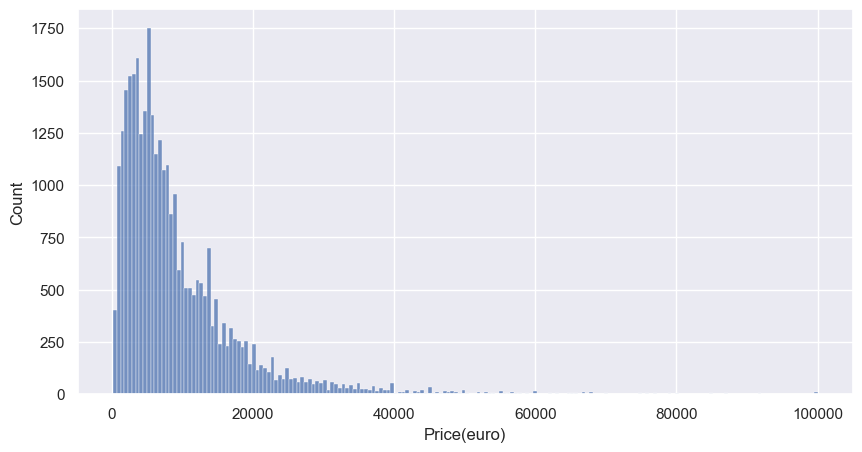

In [58]:
plt.figure(figsize=(10,5))
sns.histplot(x=df_2['Price(euro)'])


<AxesSubplot: xlabel='Price(euro)', ylabel='Count'>

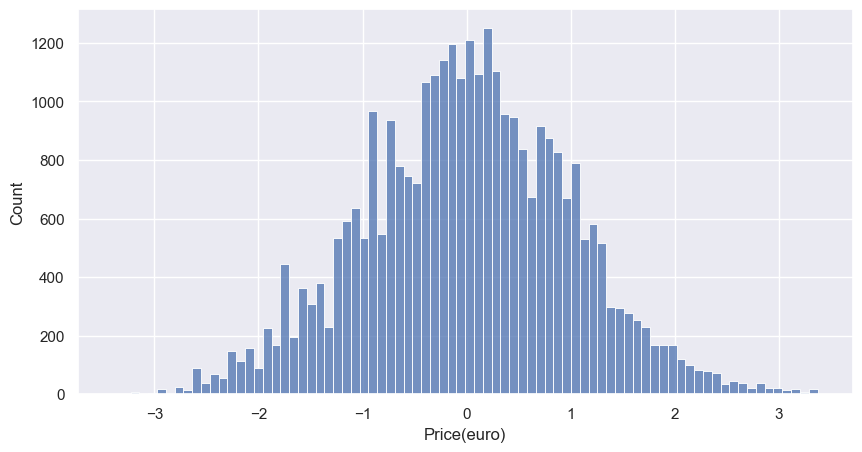

In [59]:
plt.figure(figsize=(10,5))
sns.histplot(x=df_3_power['Price(euro)'])

Всё отлично, так и должно быть.

## 3.4. One-Hot Encoding.

Попробуем инструмент get_dummies() из библиотеки pandas. Использую данный инструмент только для столбца **'Style'**, чтобы не захламлять таблицу:

In [60]:
pd.get_dummies(df_3['Style'], prefix ='Style')


Style_Cabriolet  Style_Combi  Style_Coupe  Style_Crossover  \
0                    0            0            0                0   
1                    0            0            0                0   
2                    0            0            0                0   
3                    0            0            0                0   
4                    0            0            0                0   
...                ...          ...          ...              ...   
32069                0            0            0                0   
32070                0            0            0                1   
32071                0            0            0                0   
32072                0            1            0                0   
32073                0            0            0                0   

       Style_Hatchback  Style_Microvan  Style_Minivan  Style_Pickup  \
0                    1               0              0             0   
1                    0               0              0             0   
2                    0               0              0             0   
3                    0               0              0             0   
4                    0               1              0             0   
...                ...             ...            ...           ...   
32069                0               0              0             0   
32070                0               0              0             0   
32071                0               0              0             0   
32072                0               0              0             0   
32073                0               0              1             0   

       Style_Roadster  Style_SUV  Style_Sedan  Style_Universal  
0                   0          0            0                0  
1                   0          0            0                1  
2                   0          0            0                1  
3                   0          0            0                1  
4                   0          0            0                0  
...               ...        ...          ...              ...  
32069               0          0            1                0  
32070               0          0            0                0  
32071               0          0            0                1  
32072               0          0            0                0  
32073               0          0            0                0  

[32074 rows x 12 columns]

Всё отлично, инструмент работает, теперь полученный датафрейм добавим к имеющимся данным. Тут я догадался загуглить способы объединения датафреймов не через цикл с последовательным добавлением столбцов, как делал это ранее, а через добавление кусков данных целиком. **"Оно эволюционирует"**. Для удобства записи создам новые переменные для названий и значений столбцов после применения OHE:

In [61]:
col_names = np.array(pd.get_dummies(df_3['Style'], prefix ='Style').columns)

In [62]:
col_values = np.array(pd.get_dummies(df_3['Style'], prefix ='Style'))

In [63]:
df_3_dummies_style = df_3.copy()
df_3_dummies_style[col_names] = col_values
df_3_dummies_style

Make         Model  Year      Style  Distance  \
0          Toyota         Prius  2011  Hatchback  195000.0   
1         Renault  Grand Scenic  2014  Universal  135000.0   
2         Renault        Laguna  2012  Universal  110000.0   
3            Opel         Astra  2006  Universal  200000.0   
4        Mercedes          Vito  2000   Microvan  300000.0   
...           ...           ...   ...        ...       ...   
32069  Volkswagen        Passat  2016      Sedan   88000.0   
32070  Land Rover    Freelander  2002  Crossover  225000.0   
32071       Dacia     Logan Mcv  2015  Universal   89000.0   
32072       Mazda             6  2006      Combi  370000.0   
32073     Renault  Grand Scenic  2006    Minivan  300000.0   

       Engine_capacity(cm3)     Fuel_type Transmission  Price(euro)  Age  ...  \
0                    1800.0        Hybrid    Automatic       7750.0   11  ...   
1                    1500.0        Diesel       Manual       8550.0    8  ...   
2                    1500.0        Diesel       Manual       6550.0   10  ...   
3                    1600.0  Metan/Propan       Manual       4100.0   16  ...   
4                    2200.0        Diesel       Manual       3490.0   22  ...   
...                     ...           ...          ...          ...  ...  ...   
32069                1800.0        Petrol    Automatic      11500.0    6  ...   
32070                1800.0  Metan/Propan       Manual       4400.0   20  ...   
32071                1500.0        Diesel       Manual       7000.0    7  ...   
32072                2000.0        Diesel       Manual       4000.0   16  ...   
32073                1500.0        Diesel       Manual       4000.0   16  ...   

       Style_Coupe Style_Crossover Style_Hatchback Style_Microvan  \
0                0               0               1              0   
1                0               0               0              0   
2                0               0               0              0   
3                0               0               0              0   
4                0               0               0              1   
...            ...             ...             ...            ...   
32069            0               0               0              0   
32070            0               1               0              0   
32071            0               0               0              0   
32072            0               0               0              0   
32073            0               0               0              0   

       Style_Minivan  Style_Pickup  Style_Roadster  Style_SUV  Style_Sedan  \
0                  0             0               0          0            0   
1                  0             0               0          0            0   
2                  0             0               0          0            0   
3                  0             0               0          0            0   
4                  0             0               0          0            0   
...              ...           ...             ...        ...          ...   
32069              0             0               0          0            1   
32070              0             0               0          0            0   
32071              0             0               0          0            0   
32072              0             0               0          0            0   
32073              1             0               0          0            0   

       Style_Universal  
0                    0  
1                    1  
2                    1  
3                    1  
4                    0  
...                ...  
32069                0  
32070                0  
32071                1  
32072                0  
32073                0  

[32074 rows x 27 columns]

Попробуем воспользоваться инструментом из библиотеки sklearn для OHE "по-взрослому":

In [64]:
from sklearn.preprocessing import OneHotEncoder

In [65]:
# OHE = OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False)
# df_3_ohe_sklearn = OHE.fit(df_3)
# df_3_ohe_sklearn = OHE.transform(df_3)
# df_3_ohe_sklearn

**MemoryError**: Unable to allocate 5.40 GiB for an array with shape (32074, 22588) and data type float64

Код закомменчен во избежание выскакивания ошибки, слишком уж "бигдата" получается в результате применения этого подхода ко всей таблице.

## 3.5. Сохраним полученные результаты в CSV.

Для начала выведем датафреймы с преобразованными данными и поймем, что всё сохранено верно:

1. Исходный:

In [66]:
df_3.head(3)

Make         Model  Year      Style  Distance  Engine_capacity(cm3)  \
0   Toyota         Prius  2011  Hatchback  195000.0                1800.0   
1  Renault  Grand Scenic  2014  Universal  135000.0                1500.0   
2  Renault        Laguna  2012  Universal  110000.0                1500.0   

  Fuel_type Transmission  Price(euro)  Age  km_year km_year_category  \
0    Hybrid    Automatic       7750.0   11  17727.0             High   
1    Diesel       Manual       8550.0    8  16875.0           Medium   
2    Diesel       Manual       6550.0   10  11000.0              Low   

  km_year_equal_category Make_smart  km_per_euro  
0               Medium_e     Toyota         25.2  
1               Medium_e    Renault         15.8  
2                  Low_e    Renault         16.8

2. Стандартизация:

In [67]:
df_3_scaled.head(3)

Make         Model      Style Fuel_type Transmission km_year_category  \
0   Toyota         Prius  Hatchback    Hybrid    Automatic             High   
1  Renault  Grand Scenic  Universal    Diesel       Manual           Medium   
2  Renault        Laguna  Universal    Diesel       Manual              Low   

  km_year_equal_category Make_smart      Year  Distance  Engine_capacity(cm3)  \
0               Medium_e     Toyota  0.371928  0.162384             -0.112381   
1               Medium_e    Renault  0.790766 -0.500306             -0.604333   
2                  Low_e    Renault  0.511541 -0.776426             -0.604333   

   Price(euro)       Age   km_year  km_per_euro  
0    -0.181420 -0.371928  0.392255    -0.326580  
1    -0.097487 -0.790766  0.274765    -0.469016  
2    -0.307320 -0.511541 -0.535391    -0.453863

3. Нормализация:

In [68]:
df_3_norm.head(3)

Make         Model      Style Fuel_type Transmission km_year_category  \
0   Toyota         Prius  Hatchback    Hybrid    Automatic             High   
1  Renault  Grand Scenic  Universal    Diesel       Manual           Medium   
2  Renault        Laguna  Universal    Diesel       Manual              Low   

  km_year_equal_category Make_smart  Year  Distance  Engine_capacity(cm3)  \
0               Medium_e     Toyota  0.80  0.389878              0.333333   
1               Medium_e    Renault  0.86  0.269854              0.270833   
2                  Low_e    Renault  0.82  0.219844              0.270833   

   Price(euro)   Age   km_year  km_per_euro  
0     0.075651  0.20  0.353246      0.02016  
1     0.083667  0.14  0.336172      0.01264  
2     0.063627  0.18  0.218437      0.01344

4. Степенное преобразование:

In [69]:
df_3_power.head(3)

Make         Model      Style Fuel_type Transmission km_year_category  \
0   Toyota         Prius  Hatchback    Hybrid    Automatic             High   
1  Renault  Grand Scenic  Universal    Diesel       Manual           Medium   
2  Renault        Laguna  Universal    Diesel       Manual              Low   

  km_year_equal_category Make_smart      Year  Distance  Engine_capacity(cm3)  \
0               Medium_e     Toyota  0.322832  0.219613             -0.053088   
1               Medium_e    Renault  0.809772 -0.435924             -0.571800   
2                  Low_e    Renault  0.481473 -0.727396             -0.571800   

   Price(euro)       Age   km_year  km_per_euro  
0     0.168534 -0.216442  0.445004    -0.001286  
1     0.279745 -0.758633  0.335038    -0.374350  
2    -0.019866 -0.384414 -0.470060    -0.326389

5. OHE по категории Style:

In [70]:
df_3_dummies_style.head(3)

Make         Model  Year      Style  Distance  Engine_capacity(cm3)  \
0   Toyota         Prius  2011  Hatchback  195000.0                1800.0   
1  Renault  Grand Scenic  2014  Universal  135000.0                1500.0   
2  Renault        Laguna  2012  Universal  110000.0                1500.0   

  Fuel_type Transmission  Price(euro)  Age  ...  Style_Coupe Style_Crossover  \
0    Hybrid    Automatic       7750.0   11  ...            0               0   
1    Diesel       Manual       8550.0    8  ...            0               0   
2    Diesel       Manual       6550.0   10  ...            0               0   

  Style_Hatchback Style_Microvan  Style_Minivan  Style_Pickup  Style_Roadster  \
0               1              0              0             0               0   
1               0              0              0             0               0   
2               0              0              0             0               0   

   Style_SUV  Style_Sedan  Style_Universal  
0          0            0                0  
1          0            0                1  
2          0            0                1  

[3 rows x 27 columns]

Всё отлично, теперь сохраним полученные датафреймы:

In [71]:
df_3.to_csv('content/HW1/cars_moldova_df3.csv',index=False)
df_3_scaled.to_csv('content/HW1/cars_moldova_df3_scaled.csv',index=False)
df_3_norm.to_csv('content/HW1/cars_moldova_df3_norm.csv',index=False)
df_3_power.to_csv('content/HW1/cars_moldova_df3_power.csv',index=False)
df_3_dummies_style.to_csv('content/HW1/cars_moldova_df3_dummies_style.csv',index=False)

# Выводы

Кажется, на этом данное задание можно завершить. Надеюсь, что проверка данной работы была как минимум нескучной, а сама работа оказалась достойна высокой оценки :) 
Могу сказать, что я получил большое удовольствие в ходе выполнения заданий из этой домашки и значительно лучше разобрался в представленных темах.
Наиболее долго я бился над решением "умной" категоризации редких машин, моё решение точно не оптимально, но лучше я пока что выдать не смог.
По ходу работы я постоянно чему-то учился, например, теперь я умею адекватно объединять датафреймы не через цикл, а в одну строчку. Но нет предела совершенству, а потому я закончу это повествование и перейду к изучению дальнейших тем и выполнению новых домашек.

До встречи в следующих эпизодах! =)
